In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Olga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Olga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Olga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
df = pd.read_csv('C:/Users/Olga/Downloads/archive22/train_v2_drcat_02.csv')
df.columns

Index(['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven'], dtype='object')

In [4]:
df = df[['text', 'label']]

print(df)

                                                    text  label
0      Phones\n\nModern humans today are always on th...      0
1      This essay will explain if drivers should or s...      0
2      Driving while the use of cellular devices\n\nT...      0
3      Phones & Driving\n\nDrivers should not be able...      0
4      Cell Phone Operation While Driving\n\nThe abil...      0
...                                                  ...    ...
44863  Dear Senator,\n\nI am writing to you today to ...      1
44864  Dear Senator,\n\nI am writing to you today to ...      1
44865  Dear Senator,\n\nI am writing to you today to ...      1
44866  Dear Senator,\n\nI am writing to you today to ...      1
44867  Dear Senator,\n\nI am writing to you today to ...      1

[44868 rows x 2 columns]


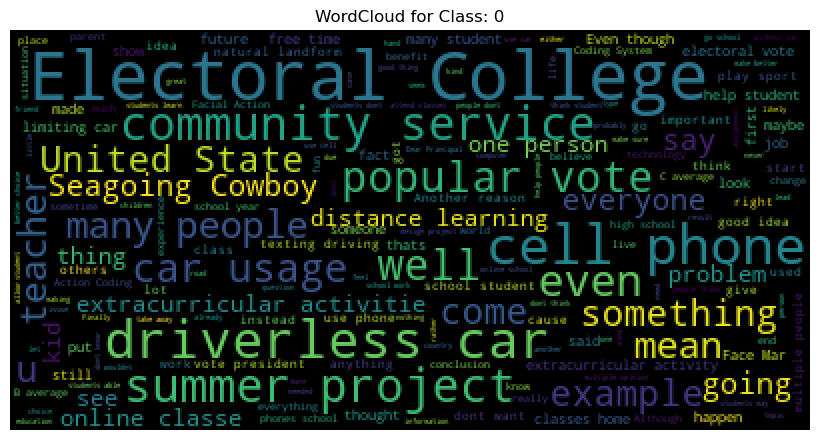

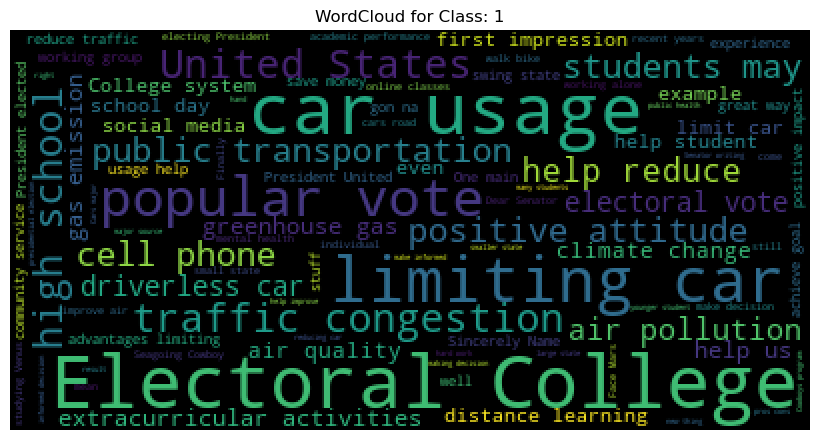

Accuracy: 0.9564296857588589
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      5481
           1       0.97      0.91      0.94      3493

    accuracy                           0.96      8974
   macro avg       0.96      0.95      0.95      8974
weighted avg       0.96      0.96      0.96      8974



In [5]:
def preprocess_text(text):
    # Видалення пунктуації
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Розбиття на слова
    words = nltk.word_tokenize(text)
    # Видалення стоп-слів
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    # Об'єднання слів назад у рядок
    processed_text = ' '.join(words)
    return processed_text

df['processed_text'] = df['text'].apply(preprocess_text)

# Візуалізація WordCloud для кожного класу
classes = df['label'].unique()
for label in classes:
    subset = df[df['label'] == label]
    text = ' '.join(subset['processed_text'])
    wordcloud = WordCloud().generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.title(f'WordCloud for Class: {label}')
    plt.show()

# Розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)

# Векторизація тексту за допомогою TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Класифікація текстових даних (припустимо, використовуємо Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)
y_pred = classifier.predict(X_test_tfidf)

# Оцінка якості класифікації
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Точність на тестових даних: {accuracy}')
print('Classification Report:\n', classification_rep)
